# Car Price Prediction Project

# Dataset Description
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper.

One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

In the dataset, I have scrapped 2000 different kinds used cars data from www.olx.in.

In [3]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


In [6]:
#loading the dataset
df=pd.read_csv('olx_car_data')
df

,Brand,Year,KMT,Fuel,Owners,Price
0,Hyundai Elite I20,2019,73700.0,DIESEL,1st,800000
1,Maruti Suzuki Omni,2018,75350.0,PETROL,1st,365000
2,Bmw X3,2014,76654.0,DIESEL,2nd,1700000
3,Tata Safari,2004,160000,DIESEL,Second,90000
4,Mahindra Scorpio,2009,120000,DIESEL,Second,325000
...,...,...,...,...,...,...
1995,Tata Zest,2014,80499.0,PETROL,1st,399000
1996,Maruti Suzuki Celerio,2015,45791.0,PETROL,--,399000
1997,Honda Amaze,2016,"61,200",CNG & HYBRIDS,1st,385000
1998,Maruti Suzuki Ertiga,2014,"990,000",DIESEL,3rd,550000


In [7]:
#finding the shape of the dataset
df.shape

(2000, 6)

In [8]:
#finding the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Brand   2000 non-null   object
 1   Year    2000 non-null   object
 2   KMT     2000 non-null   object
 3   Fuel    2000 non-null   object
 4   Owners  2000 non-null   object
 5   Price   2000 non-null   object
dtypes: object(6)
memory usage: 93.9+ KB


In [10]:
#finding the null value
df.isnull().sum()

Brand     0
Year      0
KMT       0
Fuel      0
Owners    0
Price     0
dtype: int64

<AxesSubplot:>

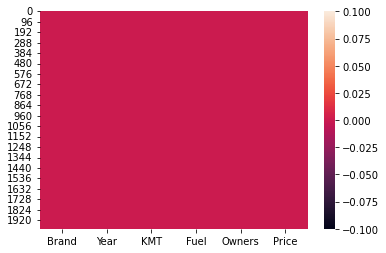

In [11]:
#checking the null value using heatmap
sns.heatmap(df.isnull())

In [12]:
df['Brand'].unique()

array(['Hyundai Elite I20', 'Maruti Suzuki Omni', 'Bmw X3', 'Tata Safari',
       'Mahindra Scorpio', 'Maruti Suzuki Zen Estilo', 'Hyundai Xcent',
       'Toyota Fortuner', 'Hyundai Verna', 'Maruti Suzuki Baleno Rs',
       'Hyundai Fluidic Verna', 'Tata Nano', 'Ford Ecosport',
       'Honda Jazz', 'Nissan Micra', 'Maruti Suzuki Swift Dzire',
       'Maruti Suzuki Wagon R', ' ', 'Renault Pulse',
       'Maruti Suzuki Alto K10', 'Volkswagen Vento',
       'Toyota Corolla Altis', 'Tata Indica V2', 'Chevrolet Spark',
       'Maruti Suzuki Ertiga', 'Maruti Suzuki Swift', 'Datsun Go',
       'Skoda Superb', 'Maruti Suzuki Celerio', 'Hyundai Creta',
       'Mahindra Others', 'Tata Zest', 'Honda Amaze', 'Hyundai Grand I10'],
      dtype=object)

In [13]:
#checking the value counts for the brand section
df['Brand'].value_counts()

                             156
Maruti Suzuki Wagon R        100
Ford Ecosport                100
Maruti Suzuki Celerio         99
Maruti Suzuki Ertiga          98
Volkswagen Vento              50
Toyota Corolla Altis          50
Tata Indica V2                50
Chevrolet Spark               50
Maruti Suzuki Swift           50
Renault Pulse                 50
Datsun Go                     50
Skoda Superb                  50
Hyundai Creta                 50
Mahindra Others               50
Tata Zest                     50
Honda Amaze                   50
Maruti Suzuki Alto K10        50
Hyundai Grand I10             50
Maruti Suzuki Omni            50
Maruti Suzuki Swift Dzire     50
Nissan Micra                  50
Honda Jazz                    50
Tata Nano                     50
Maruti Suzuki Baleno Rs       50
Hyundai Verna                 50
Toyota Fortuner               50
Hyundai Xcent                 50
Maruti Suzuki Zen Estilo      50
Mahindra Scorpio              50
Tata Safar

In [14]:
#checking the value counts for the year section
df['Year'].value_counts()

2014    449
2015    199
        156
2010    150
2012    150
2011    150
2013    148
2018    100
2009    100
2016    100
2007    100
2004     50
2006     50
2017     50
2019     48
Name: Year, dtype: int64

In [16]:
df['KMT'].unique()

array(['73700.0', '75350.0', '76654.0', '160000', '120000', '20000.0',
       '80000.0', '230000.0', '60000.0', '72000.0', '102000.0', '59000.0',
       '81000.0', '67,000', '74000.0', '66000.0', '146,000', '68,630',
       ' ', '81,000', '18348', '70000', '83000.0', '80799.0', '67845.0',
       '64,100', '33,000', '90557.0', '18000.0', '62,000', '--',
       '80499.0', '45791.0', '61,200', '990,000', '40000.0', '40,000'],
      dtype=object)

In [17]:
#checking the value counts for the fuel section
df['Fuel'].value_counts()

PETROL           949
DIESEL           795
                 156
CNG & HYBRIDS    100
Name: Fuel, dtype: int64

In [18]:
df['Owners'].unique()

array(['1st', '2nd', 'Second', '3rd', '4th', ' ', 'First', 'Third', '--'],
      dtype=object)

In [19]:

# removing the commas in kilometers value.

df['KMT'] = df['KMT'].str.replace(r',','')

In [20]:
df['KMT'].unique

<bound method Series.unique of 0       73700.0
1       75350.0
2       76654.0
3        160000
4        120000
         ...   
1995    80499.0
1996    45791.0
1997      61200
1998     990000
1999    40000.0
Name: KMT, Length: 2000, dtype: object>

In [22]:
df['Owners'] = df['Owners'].replace(['First'],'1st')

In [23]:
df['Owners'] = df['Owners'].replace(['Second'],'2nd')

In [24]:
df['Owners'].value_counts()

2nd      750
1st      696
3rd      199
         156
--        99
4th       50
Third     50
Name: Owners, dtype: int64

In [27]:
df['Price'].unique()

array(['800000', '365000', '1700000', '90000', '325000', '175000',
       '385000', '1585000', '440000', '130000', '490000', '120000',
       '540000', '425000', '250000', '225000', '550000', '151000', ' ',
       '300000', '286000', '150000', '260000', '375000', '122000',
       '91000', '390000', '380000', '240000', '400000', '1350000',
       '700000', '399000', '430000'], dtype=object)

In [28]:
#checking the value counts for the price section
df['Price'].value_counts()

           156
385000     100
375000     100
550000      99
399000      99
122000      50
300000      50
286000      50
150000      50
260000      50
151000      50
91000       50
240000      50
400000      50
1350000     50
700000      50
380000      50
430000      50
365000      50
225000      50
250000      50
425000      50
540000      50
120000      50
130000      50
440000      50
1585000     50
175000      50
325000      50
90000       50
1700000     50
490000      49
390000      49
800000      48
Name: Price, dtype: int64

# Data Visualization

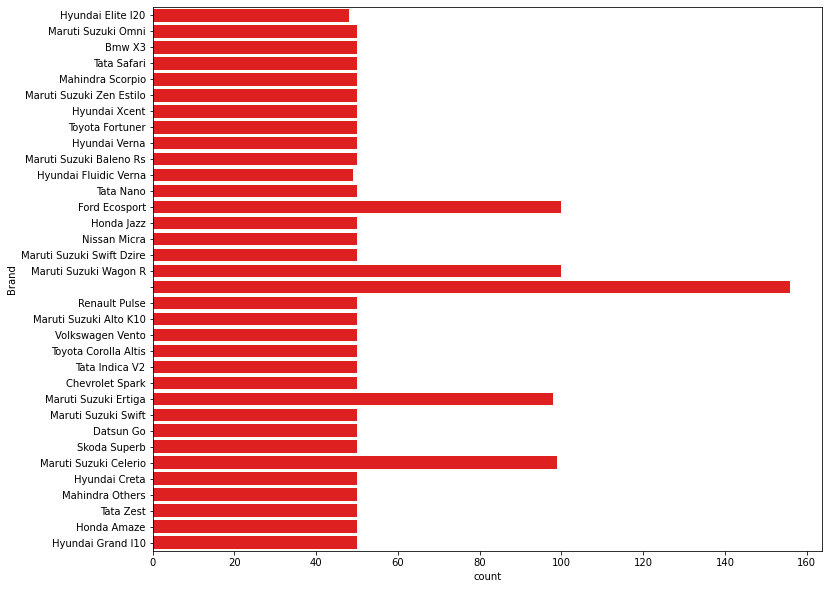

In [30]:
plt.figure(figsize=(12,10))
sns.countplot(y='Brand',data=df,color='red')
plt.show()

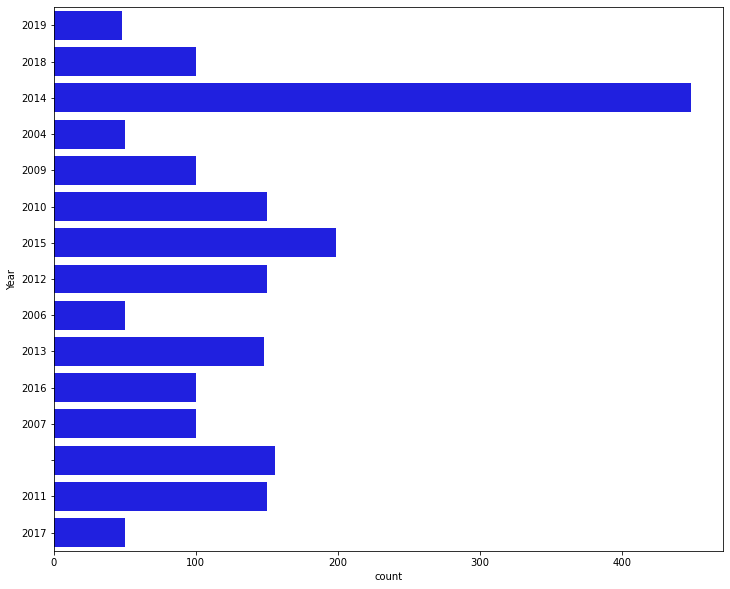

In [32]:
plt.figure(figsize=(12,10))
sns.countplot(y='Year',data=df,color='blue')
plt.show()

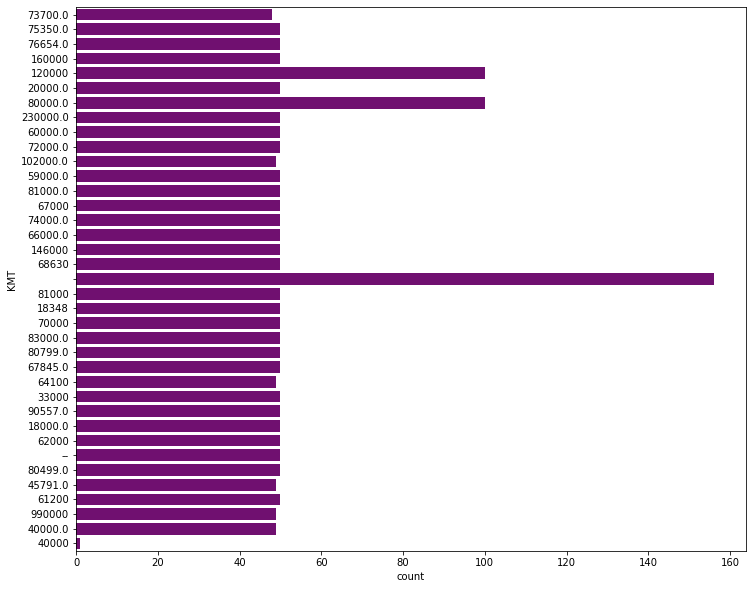

In [33]:
plt.figure(figsize=(12,10))
sns.countplot(y='KMT',data=df,color='purple')
plt.show()

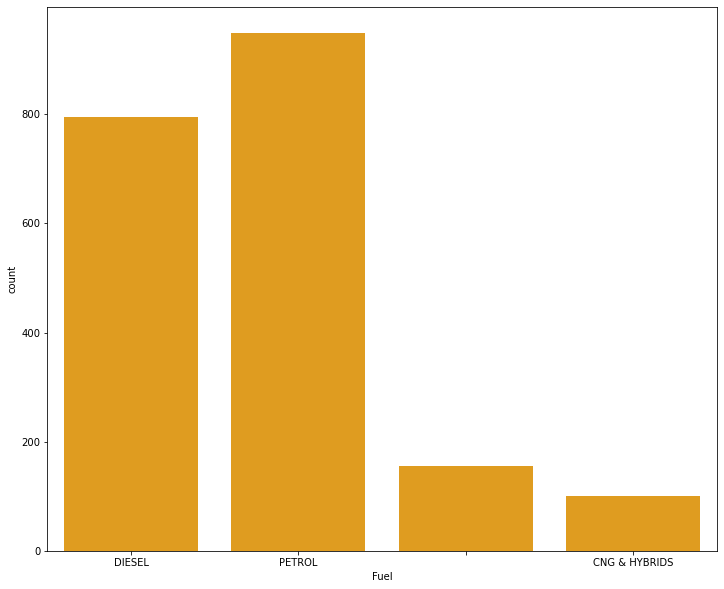

In [35]:
plt.figure(figsize=(12,10))
sns.countplot(x='Fuel',data=df,color='orange')
plt.show()

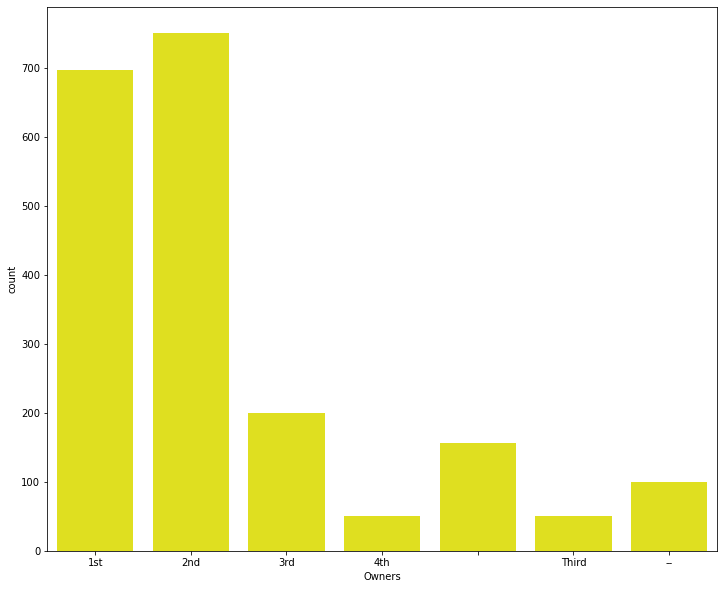

In [39]:
plt.figure(figsize=(12,10))
sns.countplot(x='Owners',data=df,color='yellow')
plt.show()

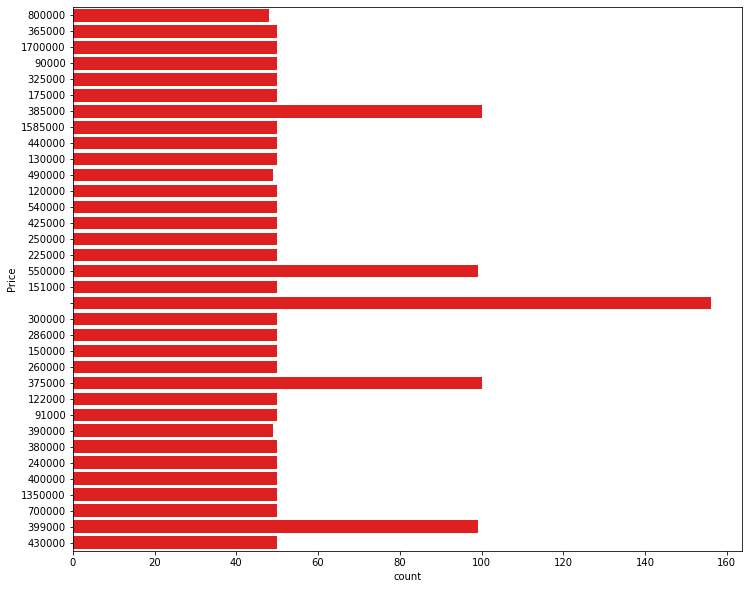

In [40]:
plt.figure(figsize=(12,10))
sns.countplot(y='Price',data=df,color='red')
plt.show()

<Figure size 1800x1296 with 0 Axes>

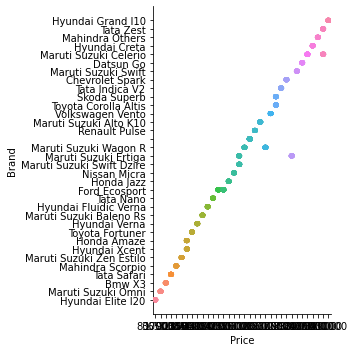

In [41]:
plt.figure(figsize=(25,18))
sns.catplot('Price','Brand',data=df)
plt.show()

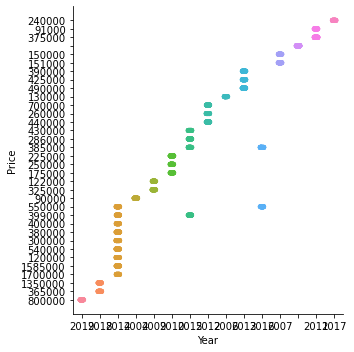

In [42]:
sns.catplot('Year','Price',data=df)

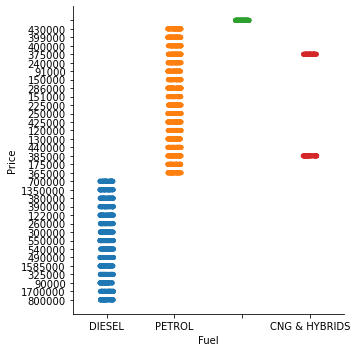

In [43]:
sns.catplot('Fuel','Price',data=df)

# Label Encoding

In [44]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Fuel']=labelencoder.fit_transform(df['Fuel'])
df['Owners']= labelencoder.fit_transform(df['Owners'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brand   2000 non-null   float64
 1   Year    2000 non-null   float64
 2   KMT     2000 non-null   float64
 3   Fuel    2000 non-null   int64  
 4   Owners  2000 non-null   int64  
 5   Price   2000 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 93.9 KB


<AxesSubplot:xlabel='Fuel', ylabel='Price'>

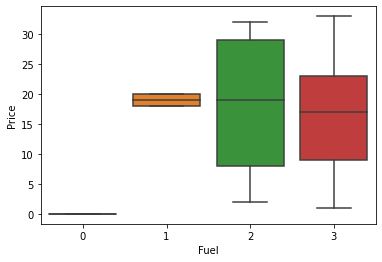

In [49]:
sns.boxplot('Fuel','Price',data=df)

<AxesSubplot:xlabel='Owners', ylabel='Price'>

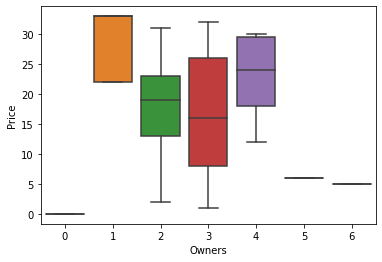

In [50]:
sns.boxplot('Owners','Price',data=df)

<AxesSubplot:xlabel='Year', ylabel='KMT'>

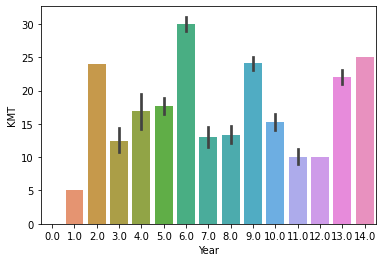

In [51]:
sns.barplot('Year','KMT',data=df)

<AxesSubplot:xlabel='Fuel', ylabel='Year'>

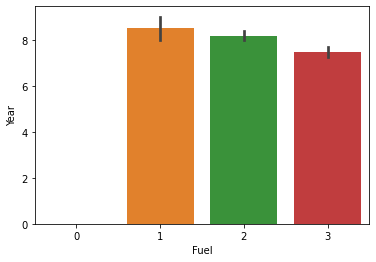

In [52]:
sns.barplot('Fuel','Year',data=df)

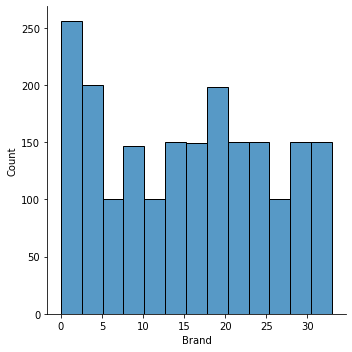

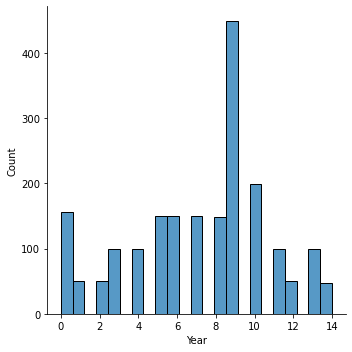

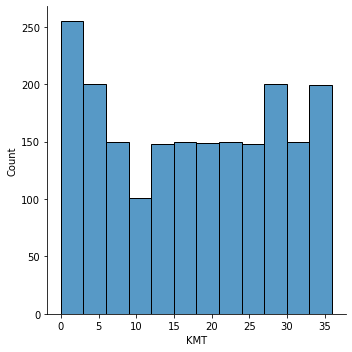

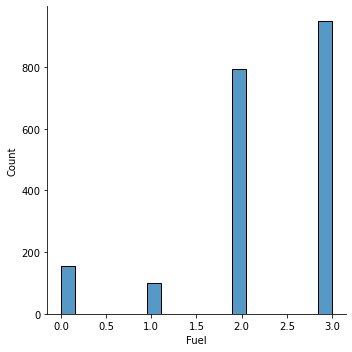

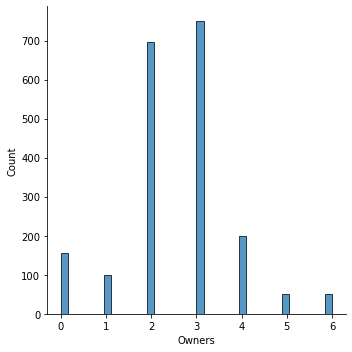

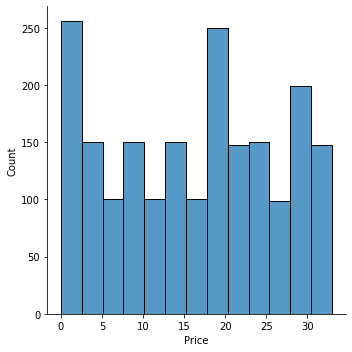

In [55]:
data=df.columns
for i in data:
    sns.displot(df[i])
    plt.show()

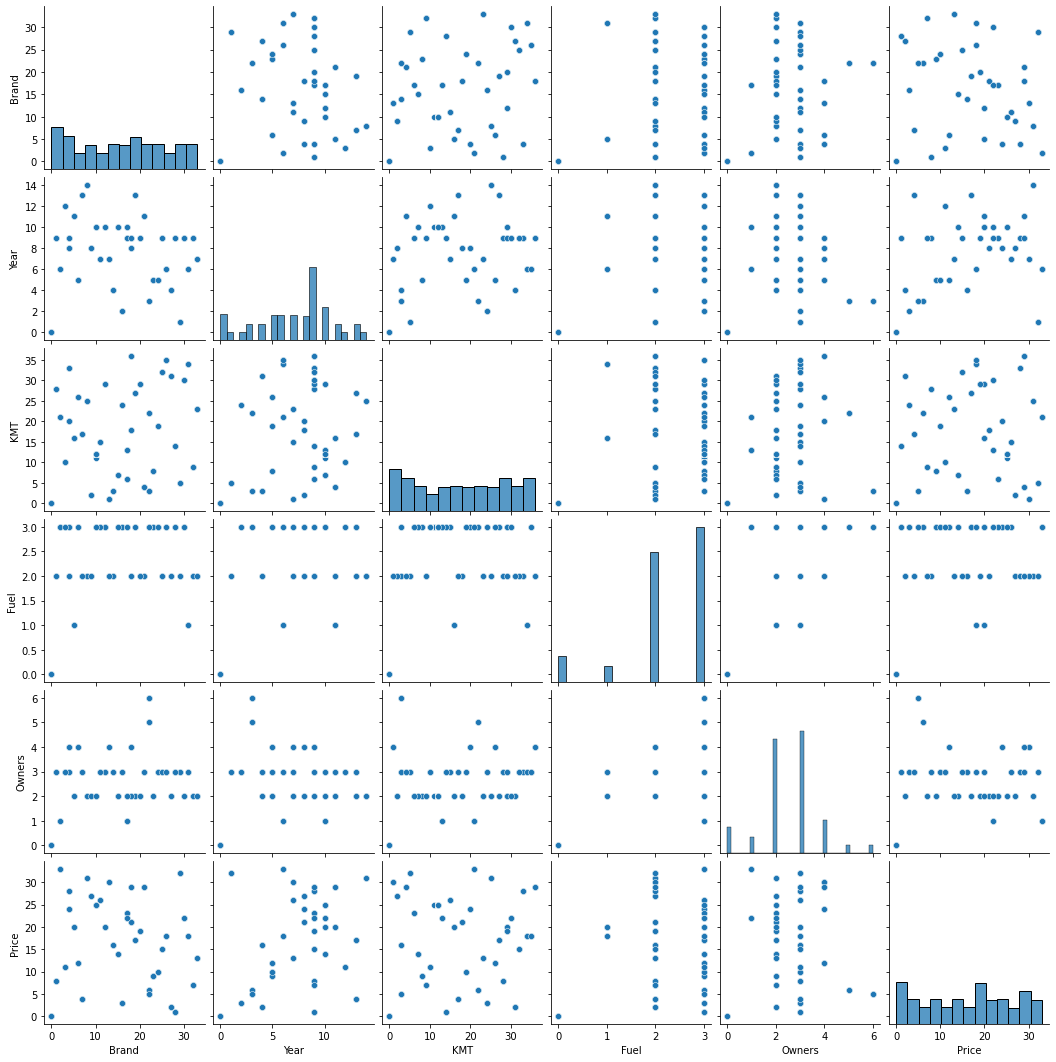

In [56]:
sns.pairplot(df)

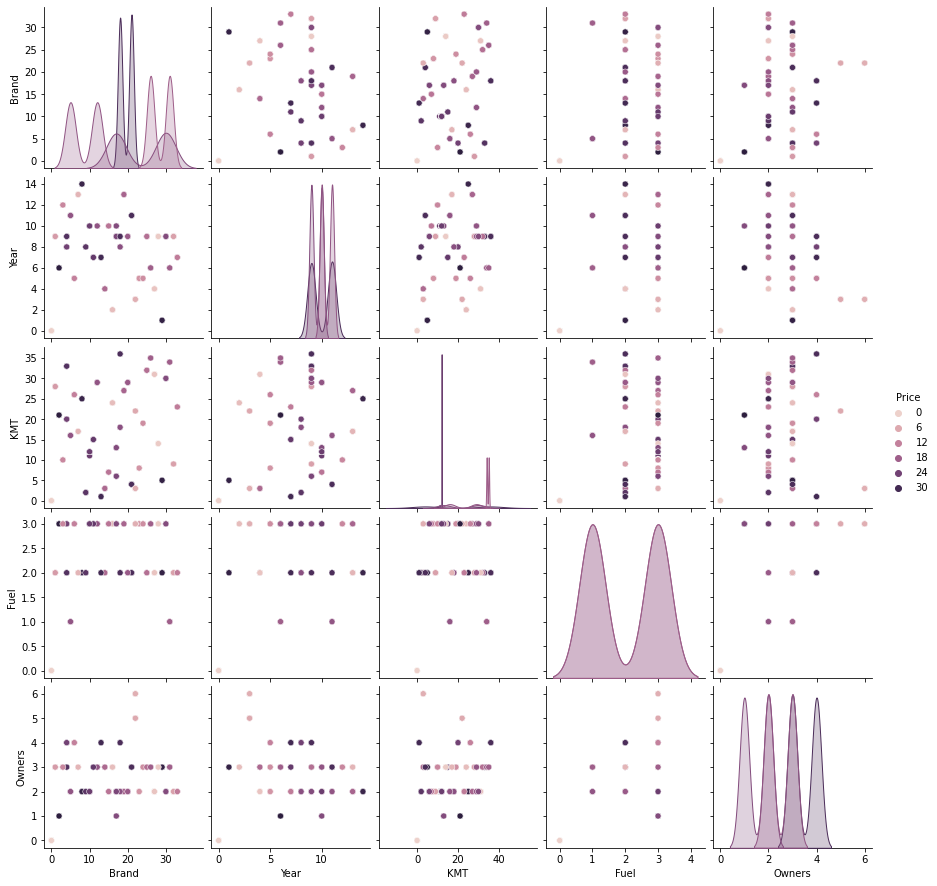

In [57]:
sns.pairplot(df,hue='Price')

In [58]:
# statical summary

df.describe()

,Brand,Year,KMT,Fuel,Owners,Price
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,15.511000,7.218500,17.11500,2.268500,2.543500,16.169500
std,9.996792,3.633092,11.35708,0.874523,1.210306,10.041872
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,6.000000,5.000000,6.00000,2.000000,2.000000,7.000000
50%,16.000000,8.000000,17.00000,2.000000,3.000000,17.000000
75%,23.250000,9.000000,27.00000,3.000000,3.000000,24.000000
max,33.000000,14.000000,36.00000,3.000000,6.000000,33.000000


There is no too much difference in mean and 50%

# Correlation

In [59]:
#checking the correlation of the dataset
df.corr()

,Brand,Year,KMT,Fuel,Owners,Price
Brand,1.000000,0.010960,0.255061,0.297755,0.271664,-0.007092
Year,0.010960,1.000000,0.314456,0.372157,0.107565,0.427507
KMT,0.255061,0.314456,1.000000,0.269226,0.252462,0.154098
Fuel,0.297755,0.372157,0.269226,1.000000,0.511924,0.253204
Owners,0.271664,0.107565,0.252462,0.511924,1.000000,0.122977
Price,-0.007092,0.427507,0.154098,0.253204,0.122977,1.000000


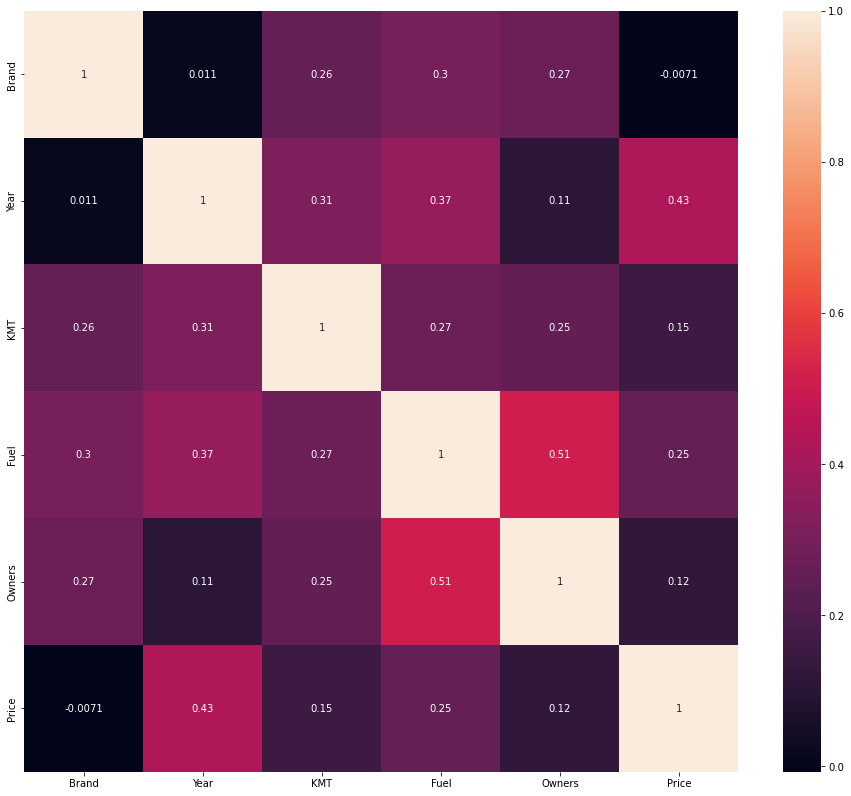

In [61]:
corr=df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr,annot=True)
plt.show()

In [62]:
# there is a good correlation between target variable price and brand.

# Removing Outliers

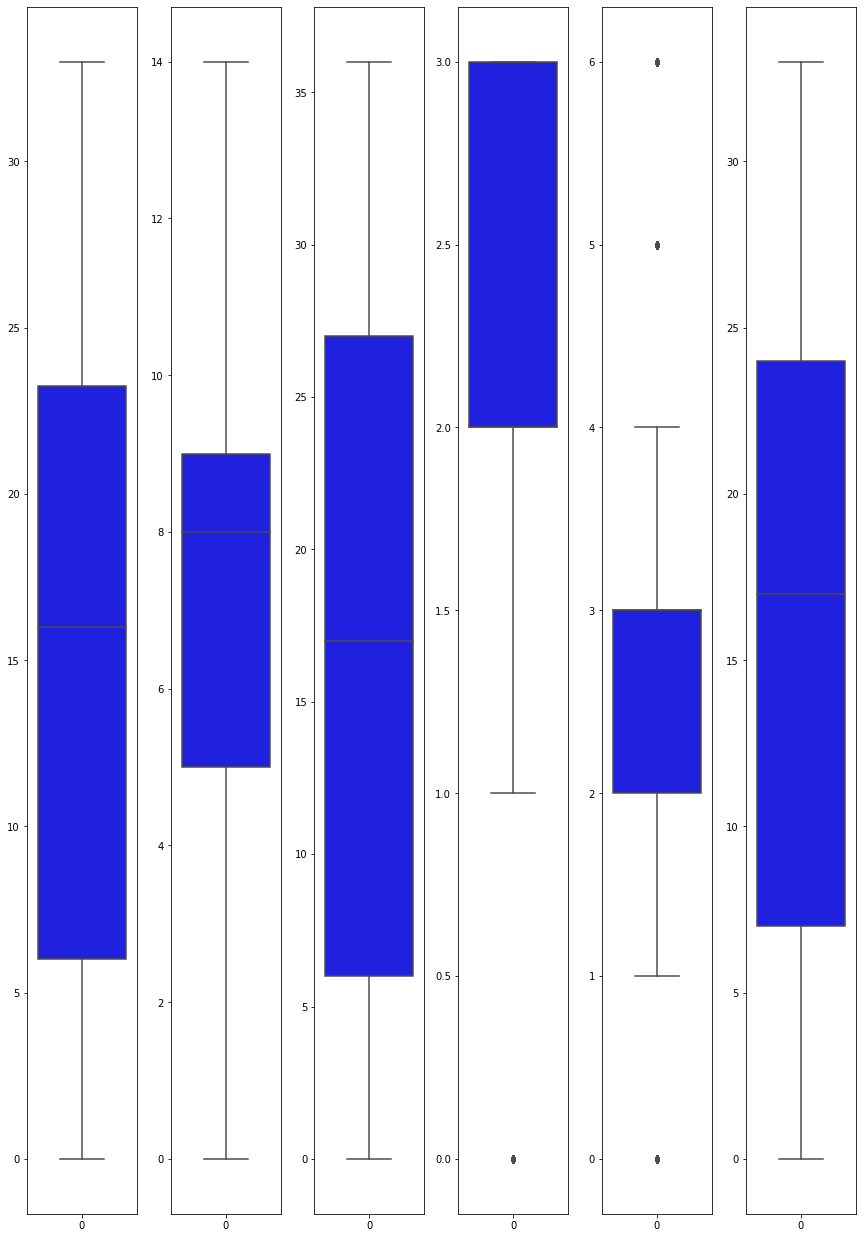

In [63]:
collist = df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(2*ncol,8*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

we see very less outliers in the data

In [64]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [65]:
new_df=df[(z<3).all(axis=1)]

In [66]:
new_df.shape

(2000, 6)

we didn'loose any data here

In [67]:
df.shape

(2000, 6)

# Skewness:

In [68]:
#checking the skewness
df.skew()

Brand     0.015525
Year     -0.402000
KMT      -0.006741
Fuel     -1.249712
Owners    0.126947
Price    -0.087730
dtype: float64

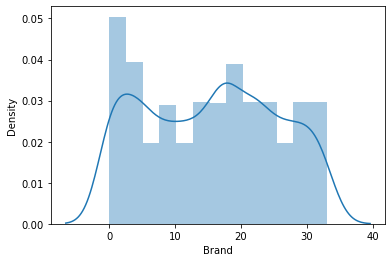

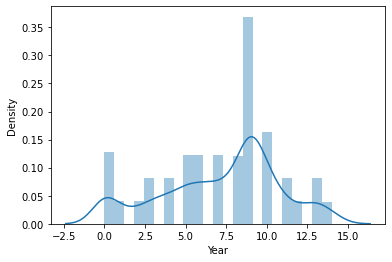

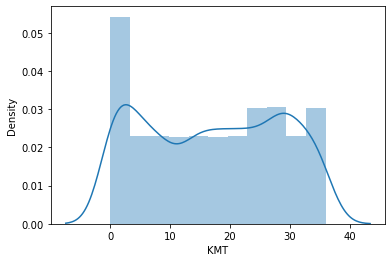

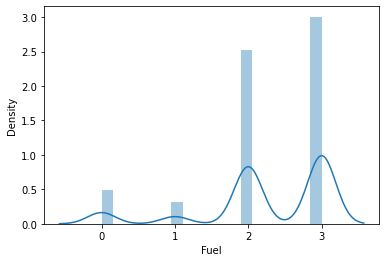

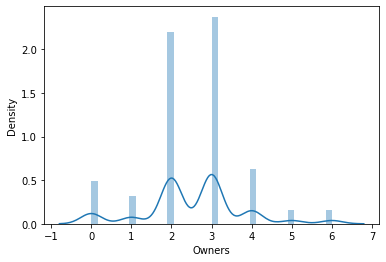

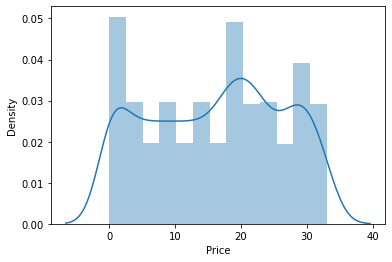

In [69]:
for i in df:
    sns.distplot(df[i])
    plt.show()

In [70]:
for i in df.columns:
    
    # removing skewness using transformation method
    if df.skew().loc[i]>0.5:
        df[i]=np.log1p(df[i])
        
        #we areusing square method to remove skewness
        if df.skew().loc[i]<0.5:
            df[i]=np.square(df[i])

In [71]:
df.skew()

Brand     0.015525
Year     -0.402000
KMT      -0.006741
Fuel     -1.249712
Owners    0.126947
Price    -0.087730
dtype: float64

# Spliting the data into Feature and Target

In [72]:
x=df.drop(columns='Price')
y=df['Price']

In [73]:
x.shape

(2000, 5)

In [74]:
y.shape

(2000,)

In [75]:
x.head()

,Brand,Year,KMT,Fuel,Owners
0,8.0,14.0,25.0,2,2
1,19.0,13.0,27.0,3,2
2,1.0,9.0,28.0,2,3
3,29.0,1.0,5.0,2,3
4,14.0,4.0,3.0,2,3


In [76]:
y.head()

0    31.0
1    17.0
2     8.0
3    32.0
4    16.0
Name: Price, dtype: float64

# Scaling

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [83]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
maxAccu=0
maxRs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i


# Train Test Split process

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=177)

In [86]:
x_train.shape

(1400, 5)

In [87]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=r2_score(y_test,pred)

In [90]:
print(f"R2 score:{acc*100}%")

R2 score:18.91301584736884%


In [91]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
acc=r2_score(y_test,pred)
print(f"R2 score:{acc*100}%")

R2 score:100.0%


In [92]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
acc=r2_score(y_test,pred)
print(f"R2 score:{acc*100}%")

R2 score:100.0%


In [94]:
ls=Lasso()
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
acc=r2_score(y_test,pred)
print(f"R2 score:{acc*100}%")

R2 score:17.480860819048928%


In [96]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
acc=r2_score(y_test,pred)
print(f"R2 score:{acc*100}%")

R2 score:99.48165627607581%


In [97]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=r2_score(y_test,pred)

print(f"R2 Score: {acc*100}%")

R2 Score: 100.0%


In [98]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
acc=r2_score(y_test,pred)


print(f"R2 Score: {acc*100}%")

R2 Score: 79.73567346144463%


# Cross Validation

In [101]:
cvlr=cross_val_score(lr,x,y,cv=5).mean()
print("Cross validation score for Linear Regression is :",cvlr)

Cross validation score for Linear Regression is : 0.19650523941962308


In [104]:
cvdtr=cross_val_score(dtr,x,y,cv=5).mean()
print("Cross validation score for Decision Tree Regression is:",cvdtr)

Cross validation score for Decision Tree Regression is: 1.0


In [105]:
cvrfr=cross_val_score(rfr,x,y,cv=5).mean()
print("Cross validation score for Random Forest Regressor is:",cvrfr)

Cross validation score for Random Forest Regressor is: 1.0


In [106]:
cvls=cross_val_score(ls,x,y,cv=5).mean()
print("Cross validation score for Random Forest Regressor is:",cvls)

Cross validation score for Random Forest Regressor is: 0.17850516263742766


In [107]:
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print("Cross validation score for Random Forest Regressor is:",cvknn)

Cross validation score for Random Forest Regressor is: 1.0


In [108]:
cvgbr=cross_val_score(gbr,x,y,cv=5).mean()
print("Cross validation score for Random Forest Regressor is:",cvgbr)

Cross validation score for Random Forest Regressor is: 0.9955511740951011


In [109]:
cvsvr=cross_val_score(svr,x,y,cv=5).mean()
print("Cross validation score for Random Forest Regressor is:",cvsvr)

Cross validation score for Random Forest Regressor is: 0.8335787801160203


# Overfitting & Underfitting

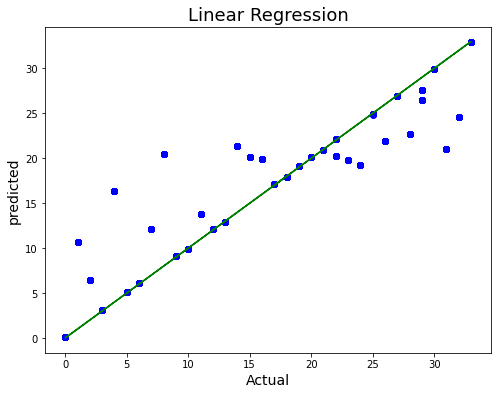

In [111]:
#plotting the final model
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='b')
plt.plot(y_test,y_test,color='g')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Hyper Parameter Tuning:

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
parameter={'max_depth':[100,200,500,1000],
          'n_estimators':[10,100,500],
          'subsample':[0.001,0.01,0.1,1.0],
          'random_state':[50,100,200]}

In [115]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [116]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [100, 200, 500, 1000],
                         'n_estimators': [10, 100, 500],
                         'random_state': [50, 100, 200],
                         'subsample': [0.001, 0.01, 0.1, 1.0]})

In [117]:
GCV.best_params_






{'max_depth': 100, 'n_estimators': 500, 'random_state': 50, 'subsample': 0.1}

In [119]:
car_price_final=GradientBoostingRegressor(max_depth=100, n_estimators=500, random_state=50, subsample=1.0)
car_price_final.fit(x_train,y_train)
pred=car_price_final.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

100.0


We are getting the model accuracy and cross validation score both as 100% which our model is performing well

# Saving the model

In [122]:
import joblib
joblib.dump(car_price_final,'Car_price_prediction(submission).pkl')

['Car_price_prediction(submission).pkl']

In [126]:
Car_price_model=joblib.load(open('Car_price_prediction(submission).pkl','rb'))
result = car_price_model.score(x_test,y_test)
print(result)

1.0


In [127]:
Conclusion = pd.DataFrame([Car_price_model.predict(x_test)[:],gbr.predict(x_test)[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
Predicted,18.000000,3.000000,6.000000,8.000000,12.000000,1.432251e-08,4.000000,1.432251e-08,2.000000,31.000000,...,11.000000,22.000000,29.000000,16.000000,30.000000,16.000000,14.000000,1.432251e-08,9.000000,17.000000
Original,17.761476,3.223881,6.037443,8.240152,12.618904,2.351683e-01,5.351123,2.351683e-01,2.264166,30.488606,...,11.416978,21.575209,28.594289,15.789351,29.409314,15.789351,15.956184,2.351683e-01,8.615105,16.402902
